## **1. 데이터 & 라이브러리 불러오기**

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%pwd

'/content'

In [4]:
!unzip '/content/drive/MyDrive/데이터 크리에이터 캠프/Data/Data_3(테스트_트레인_분류).zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: content/train_test/test/outerwear/img3979.jpg  
  inflating: content/train_test/test/outerwear/img3772.jpg  
   creating: content/train_test/test/cap_and_hat/
  inflating: content/train_test/test/cap_and_hat/img12822.jpg  
  inflating: content/train_test/test/cap_and_hat/img3426.jpg  
  inflating: content/train_test/test/cap_and_hat/img14023.jpg  
  inflating: content/train_test/test/cap_and_hat/img17254.jpg  
  inflating: content/train_test/test/cap_and_hat/img9424.jpg  
  inflating: content/train_test/test/cap_and_hat/img24821.jpg  
  inflating: content/train_test/test/cap_and_hat/img16684.jpg  
  inflating: content/train_test/test/cap_and_hat/img1637.jpg  
  inflating: content/train_test/test/cap_and_hat/img15420.jpg  
  inflating: content/train_test/test/cap_and_hat/img4900.jpg  
  inflating: content/train_test/test/cap_and_hat/img3017.jpg  
  inflating: content/train_test/test/cap_and_hat/img17259.jpg  
  inflating: content/train_te

In [5]:
# 잘 압축이 풀어졌는지 확인
import os

test_bottoms_cnt = len(os.listdir("/content/content/train_test/test/bottoms"))
test_capandhat_cnt = len(os.listdir("/content/content/train_test/test/cap_and_hat"))
test_outerwear_cnt = len(os.listdir("/content/content/train_test/test/outerwear"))
test_shoes_cnt = len(os.listdir("/content/content/train_test/test/shoes"))
test_tops_cnt = len(os.listdir("/content/content/train_test/test/tops"))
print('테스트 데이터 수 :', test_bottoms_cnt + test_capandhat_cnt + test_outerwear_cnt + test_shoes_cnt + test_tops_cnt)

train_bottoms_cnt = len(os.listdir("/content/content/train_test/train/bottoms"))
train_capandhat_cnt = len(os.listdir("/content/content/train_test/train/cap_and_hat"))
train_outerwear_cnt = len(os.listdir("/content/content/train_test/train/outerwear"))
train_shoes_cnt = len(os.listdir("/content/content/train_test/train/shoes"))
train_tops_cnt = len(os.listdir("/content/content/train_test/train/tops"))
print('트레인 데이터 수 :', train_bottoms_cnt + train_capandhat_cnt + train_outerwear_cnt + train_shoes_cnt + train_tops_cnt)

테스트 데이터 수 : 6002
트레인 데이터 수 : 23998


## **2. 데이터 전처리하기**

### **2.1 데이터 생성, 해상도 변경**

`tf.keras.preprocessing.image_dataset_from_directory` 힘수를 이용하여 데이터 전처리 수행

[참고 자료](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)

In [9]:
train_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/content/train_test/train/',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (227, 128), # 사진 크기를 227대128로
    batch_size = 32, # 32개씩 데이터 처리
    subset = 'training', # training 데이터
    validation_split=0.15, # training 데이터는 80%    
)

val_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/content/train_test/train/',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (227, 128),
    batch_size = 32,
    subset = 'validation', # val 데이터
    validation_split=0.15, # val 데이터는 20%    
)

test_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/content/train_test/test/',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (227, 128),
    batch_size = 32,
    subset = None, 
    validation_split= None
)

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

Found 23998 files belonging to 5 classes.
Using 20399 files for training.
Found 23998 files belonging to 5 classes.
Using 3599 files for validation.
Found 6002 files belonging to 5 classes.


In [10]:
train_gray_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/content/train_test/train/',
    label_mode	= 'categorical',
    seed = 18,    
    image_size = (227, 128), # 사진 크기를 227대128로
    batch_size = 32, # 32개씩 데이터 처리
    color_mode = 'grayscale',
    subset = 'training', # training 데이터
    validation_split=0.15, # training 데이터는 80%    
)

val_gray_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/content/train_test/train/',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (227, 128),
    batch_size = 32,
    color_mode = 'grayscale',
    subset = 'validation', # val 데이터
    validation_split=0.15, # val 데이터는 20%    
)

test_gray_img = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/content/train_test/test/',
    label_mode	= 'categorical',
    seed = 18,
    image_size = (227, 128),
    batch_size = 32,
    color_mode = 'grayscale',
    subset = None, 
    validation_split= None
)

Found 23998 files belonging to 5 classes.
Using 20399 files for training.
Found 23998 files belonging to 5 classes.
Using 3599 files for validation.
Found 6002 files belonging to 5 classes.


In [14]:
train_img  

<BatchDataset element_spec=(TensorSpec(shape=(None, 227, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

**[이슈 3] 사진 이미지 크기의 해상도를 128대 128로 변경하여 학습시간을 줄인다.**

**[이슈 3] color_mode가 gray인 데이터도 만들어서 성능 비교를 해보자**

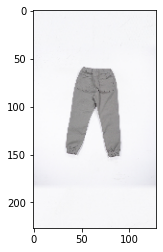

In [15]:
# 데이터는 다음과 같이 출력할 수 있다.
import matplotlib.pyplot as plt

for i, j in train_img.take(1):
  plt.imshow(i[0].numpy().astype('uint8'))  

In [16]:
# import matplotlib.pyplot as plt

# for i, j in train_gray_img.take(1):
#   plt.imshow(i[0].numpy().astype('uint8'))

grayscale 이미지는 출력을 못하나보다.

### **2.2 데이터 압축**

In [17]:
def pre(i, j):
  i = tf.cast(i/255.0, tf.float32)
  return i, j

train_img = train_img.map(pre)
val_img = val_img.map(pre)

train_gray_img = train_gray_img.map(pre)
val_gray_img = val_gray_img.map(pre)

test_img = test_img.map(pre)
test_gray_img = test_gray_img.map(pre)

In [18]:
for i, j in train_img.take(1):
  print(i)
  print(j)

tf.Tensor(
[[[[0.9246831  0.9246831  0.93252623]
   [0.9242377  0.92080635 0.9401691 ]
   [0.9247857  0.9208641  0.9443935 ]
   ...
   [0.92524886 0.92776144 0.9463581 ]
   [0.9341739  0.935747   0.956284  ]
   [0.9362475  0.94384557 0.9583064 ]]

  [[0.91378707 0.9174932  0.93300503]
   [0.92588913 0.92245775 0.9413611 ]
   [0.9260522  0.92213064 0.94566005]
   ...
   [0.93117064 0.9314762  0.9489705 ]
   [0.9265252  0.9378887  0.9570166 ]
   [0.93654716 0.94062257 0.9562575 ]]

  [[0.92499626 0.9289178  0.94852567]
   [0.9279299  0.92965686 0.95584834]
   [0.9208085  0.92473006 0.9430212 ]
   ...
   [0.9359382  0.93985975 0.9572617 ]
   [0.9350603  0.9389819  0.9570091 ]
   [0.9254902  0.92941177 0.9474389 ]]

  ...

  [[0.9580882  0.95634013 0.97486126]
   [0.96480465 0.96604145 0.9746199 ]
   [0.9561712  0.9600928  0.96971416]
   ...
   [0.9510279  0.9549495  0.96279263]
   [0.9567639  0.9533326  0.97269535]
   [0.941908   0.95416665 0.9727866 ]]

  [[0.9593951  0.9633167  0.978777

실제로 데이터가 잘 압축된 것을 확인할 수 있다.

**[이슈 3] 숫자의 크기를 줄여 학습시간을 줄인다.**

## **3. 첫번째 모델 생성**
> 모델 레이어 중 이미지 증강 없는 버전

### **3.1 모델 선언**

In [25]:
from keras import backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

#https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d

In [26]:
model1 = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape=(227, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(5, activation='softmax')                             
])

In [27]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', get_f1])
# 레이블값이 원핫인코딩 되어 있는 경우 loss 함수를 categorical_crossentropy로
# 안되어 있는 경우 sparse_categorical_crossentropy로

In [28]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 227, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 113, 64, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 113, 64, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 32, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 32, 128)      

### **3.2 모델 학습**

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min')
# acc면 mode를 max로 
# loss면 mode를 min으로

In [30]:
history_1 = model1.fit(train_img, validation_data = val_img, epochs=20, callbacks = [early_stop])

Epoch 1/20
638/638 [==============================] - 208s 320ms/step - loss: 0.5930 - accuracy: 0.7809 - get_f1: 0.7702 - val_loss: 0.3828 - val_accuracy: 0.8516 - val_get_f1: 0.8499
Epoch 2/20
638/638 [==============================] - 186s 290ms/step - loss: 0.3921 - accuracy: 0.8555 - get_f1: 0.8556 - val_loss: 0.3282 - val_accuracy: 0.8725 - val_get_f1: 0.8710
Epoch 3/20
638/638 [==============================] - 185s 287ms/step - loss: 0.3336 - accuracy: 0.8808 - get_f1: 0.8795 - val_loss: 0.3066 - val_accuracy: 0.8825 - val_get_f1: 0.8820
Epoch 4/20
638/638 [==============================] - 180s 280ms/step - loss: 0.2866 - accuracy: 0.8971 - get_f1: 0.8963 - val_loss: 0.2781 - val_accuracy: 0.8941 - val_get_f1: 0.8931
Epoch 5/20
638/638 [==============================] - 196s 304ms/step - loss: 0.2476 - accuracy: 0.9087 - get_f1: 0.9088 - val_loss: 0.2751 - val_accuracy: 0.8977 - val_get_f1: 0.8966
Epoch 6/20
638/638 [==============================] - 191s 297ms/step - loss: 0.

### **3.3 모델 성능 평가**

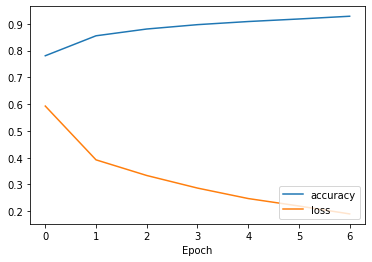

In [33]:
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

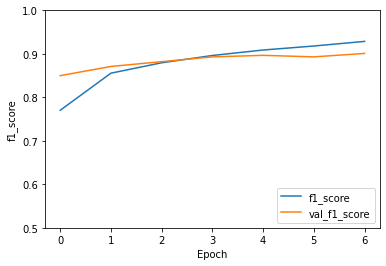

In [32]:
plt.plot(history_1.history['get_f1'], label='f1_score')
plt.plot(history_1.history['val_get_f1'], label = 'val_f1_score') 
plt.xlabel('Epoch')
plt.ylabel('f1_score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**test data 정확도 확인**

In [34]:
test_loss, test_acc, f1_score = model1.evaluate(test_img)
print('테스트 데이터 acc : ', test_acc)
print('테스트 데이터 f1_score : ', f1_score)
print('테스트 데이터 loss : ', test_loss)

188/188 [==============================] - 46s 234ms/step - loss: 0.2911 - accuracy: 0.9012 - get_f1: 0.9013
테스트 데이터 acc :  0.9011995792388916
테스트 데이터 f1_score :  0.9012944102287292
테스트 데이터 loss :  0.2910986542701721


In [35]:
model1.save('/content/drive/MyDrive/데이터 크리에이터 캠프/model/첫번째_모델(test_f1_score : 0.9012944102287292)')

## **4. 두번째 모델 생성**
> 모델 레이어 중 이미지 증강 있는 버전
> 모델 레이어에 이미지 증강을 넣으면 오버피팅을 막을 수 있다고 한다.

### **4.1 모델 선언**

In [39]:
model2 = tf.keras.Sequential([
    
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(227, 128, 3)), # 랜덤으로 이미지가 뒤집어진다.
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1), # 랜덤으로 돌려진다.
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1), # 랜덤으로 줌이 된다.    
    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing

    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(5, activation='softmax')                             
])

In [40]:
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', get_f1])

In [41]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 227, 128, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 227, 128, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 227, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 227, 128, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 113, 64, 32)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 113, 64, 64)      

### **4.2 모델 학습**

In [42]:
history_2 = model2.fit(train_img, validation_data = val_img, epochs=20, callbacks = [early_stop])

Epoch 1/20
638/638 [==============================] - 210s 324ms/step - loss: 0.7582 - accuracy: 0.7216 - get_f1: 0.7050 - val_loss: 0.5512 - val_accuracy: 0.7899 - val_get_f1: 0.7836
Epoch 2/20
638/638 [==============================] - 209s 326ms/step - loss: 0.5720 - accuracy: 0.7785 - get_f1: 0.7765 - val_loss: 0.4820 - val_accuracy: 0.8124 - val_get_f1: 0.8111
Epoch 3/20
638/638 [==============================] - 197s 306ms/step - loss: 0.5122 - accuracy: 0.8034 - get_f1: 0.8012 - val_loss: 0.4147 - val_accuracy: 0.8447 - val_get_f1: 0.8421
Epoch 4/20
638/638 [==============================] - 195s 303ms/step - loss: 0.4757 - accuracy: 0.8202 - get_f1: 0.8174 - val_loss: 0.3853 - val_accuracy: 0.8536 - val_get_f1: 0.8507
Epoch 5/20
638/638 [==============================] - 208s 323ms/step - loss: 0.4401 - accuracy: 0.8333 - get_f1: 0.8316 - val_loss: 0.3609 - val_accuracy: 0.8641 - val_get_f1: 0.8652
Epoch 6/20
638/638 [==============================] - 194s 301ms/step - loss: 0.

### **4.3 모델 성능 평가**

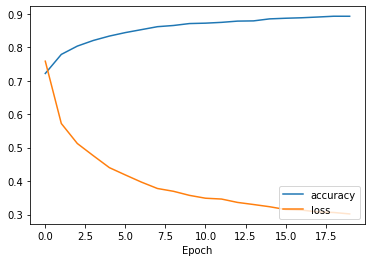

In [43]:
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

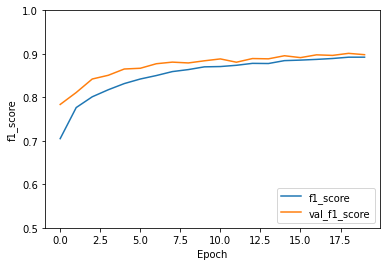

In [44]:
plt.plot(history_2.history['get_f1'], label='f1_score')
plt.plot(history_2.history['val_get_f1'], label = 'val_f1_score') 
plt.xlabel('Epoch')
plt.ylabel('f1_score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**test data 정확도 확인**

In [45]:
test_loss, test_acc, f1_score = model2.evaluate(test_img)
print('테스트 데이터 acc : ', test_acc)
print('테스트 데이터 f1_score : ', f1_score)
print('테스트 데이터 loss : ', test_loss)

188/188 [==============================] - 47s 237ms/step - loss: 0.3166 - accuracy: 0.8852 - get_f1: 0.8858
테스트 데이터 acc :  0.8852049112319946
테스트 데이터 f1_score :  0.8857507705688477
테스트 데이터 loss :  0.31658485531806946


In [46]:
model2.save('/content/drive/MyDrive/데이터 크리에이터 캠프/model/두번째_모델(test_f1_score : 0.8857507705688477)')

## **5. 세번째 모델 생성**
> 데이터를 흑백 이미지로 변형하여 학습시켜보자

> 이미지 증강 없이 학습시켜보자

### **5.1 모델 선언**

In [47]:
model3 = tf.keras.Sequential([      
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape=(227, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(5, activation='softmax')                             
])

In [48]:
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', get_f1])

In [49]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 227, 128, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 113, 64, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 113, 64, 64)       18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 56, 32, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 32, 128)      

### **5.2 모델 학습**

In [50]:
history_3 = model3.fit(train_gray_img, validation_data = val_gray_img, epochs=20, callbacks = [early_stop])

Epoch 1/20
638/638 [==============================] - 145s 224ms/step - loss: 0.5966 - accuracy: 0.7795 - get_f1: 0.7663 - val_loss: 0.3835 - val_accuracy: 0.8483 - val_get_f1: 0.8489
Epoch 2/20
638/638 [==============================] - 141s 219ms/step - loss: 0.4004 - accuracy: 0.8520 - get_f1: 0.8508 - val_loss: 0.3216 - val_accuracy: 0.8833 - val_get_f1: 0.8821
Epoch 3/20
638/638 [==============================] - 143s 221ms/step - loss: 0.3388 - accuracy: 0.8776 - get_f1: 0.8774 - val_loss: 0.3086 - val_accuracy: 0.8844 - val_get_f1: 0.8840
Epoch 4/20
638/638 [==============================] - 141s 218ms/step - loss: 0.2918 - accuracy: 0.8939 - get_f1: 0.8935 - val_loss: 0.2827 - val_accuracy: 0.8916 - val_get_f1: 0.8923
Epoch 5/20
638/638 [==============================] - 141s 219ms/step - loss: 0.2565 - accuracy: 0.9074 - get_f1: 0.9071 - val_loss: 0.2809 - val_accuracy: 0.8939 - val_get_f1: 0.8938
Epoch 6/20
638/638 [==============================] - 142s 220ms/step - loss: 0.

### **5.3 모델 성능 평가**

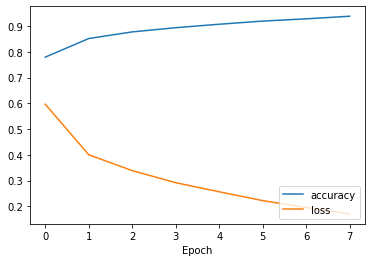

In [51]:
plt.plot(history_3.history['accuracy'], label='accuracy')
plt.plot(history_3.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

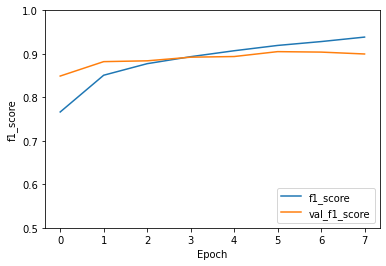

In [52]:
plt.plot(history_3.history['get_f1'], label='f1_score')
plt.plot(history_3.history['val_get_f1'], label = 'val_f1_score') 
plt.xlabel('Epoch')
plt.ylabel('f1_score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**test data 정확도 확인**

In [54]:
test_loss, test_acc, f1_score = model3.evaluate(test_gray_img)
print('테스트 데이터 acc : ', test_acc)
print('테스트 데이터 f1_score : ', f1_score)
print('테스트 데이터 loss : ', test_loss)

188/188 [==============================] - 35s 179ms/step - loss: 0.3516 - accuracy: 0.9039 - get_f1: 0.9036
테스트 데이터 acc :  0.903865396976471
테스트 데이터 f1_score :  0.903618574142456
테스트 데이터 loss :  0.3515664339065552


In [55]:
model3.save('/content/drive/MyDrive/데이터 크리에이터 캠프/model/세번째_모델(test_f1_score : 0.903865396976471)')